 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import seaborn as sns
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Assigning paths
algo_returns_filepath = Path('Resources/algo_returns.csv')
sp_tsx_history_filepath = Path('Resources/sp_tsx_history.csv')
whale_returns_filepath = Path('Resources/whale_returns.csv')

In [3]:
# Reading whale returns
whale_returns = pd.read_csv(whale_returns_filepath, index_col='Date', infer_datetime_format=True, parse_dates=True).sort_index()

In [4]:
# Count nulls
whale_returns.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
algo_returns = pd.read_csv(algo_returns_filepath, index_col='Date', infer_datetime_format=True, parse_dates=True).sort_index()

In [7]:
# Count nulls
algo_returns.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns.dropna(inplace=True)

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history = pd.read_csv(sp_tsx_history_filepath, index_col='Date', infer_datetime_format=True, parse_dates=True).sort_index()

In [10]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace("$", "")
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace(",", "")
sp_tsx_history["Close"] = sp_tsx_history["Close"].astype('float')

C:\Users\Julian\AppData\Local\Temp\ipykernel_9288\1760552814.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace("$", "")


In [12]:
# Calculate Daily Returns
sp_tsx_returns = sp_tsx_history.pct_change()

In [13]:
# Drop nulls
sp_tsx_returns.dropna(inplace=True)

In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_returns.columns = ["S&P TSX"]

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_returns, sp_tsx_returns], axis='columns', join='inner')
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

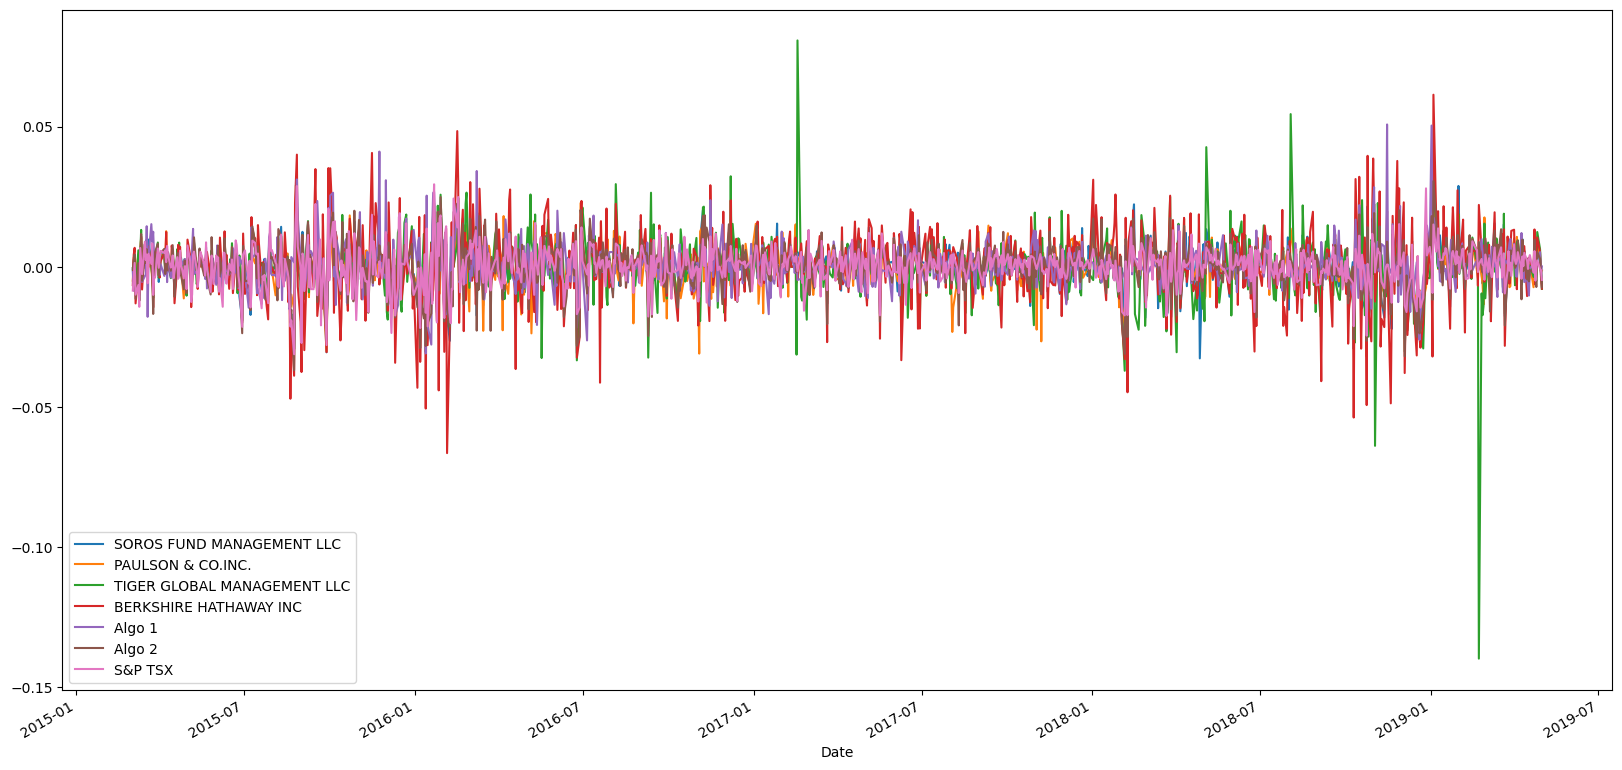

In [16]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=[20, 10])

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

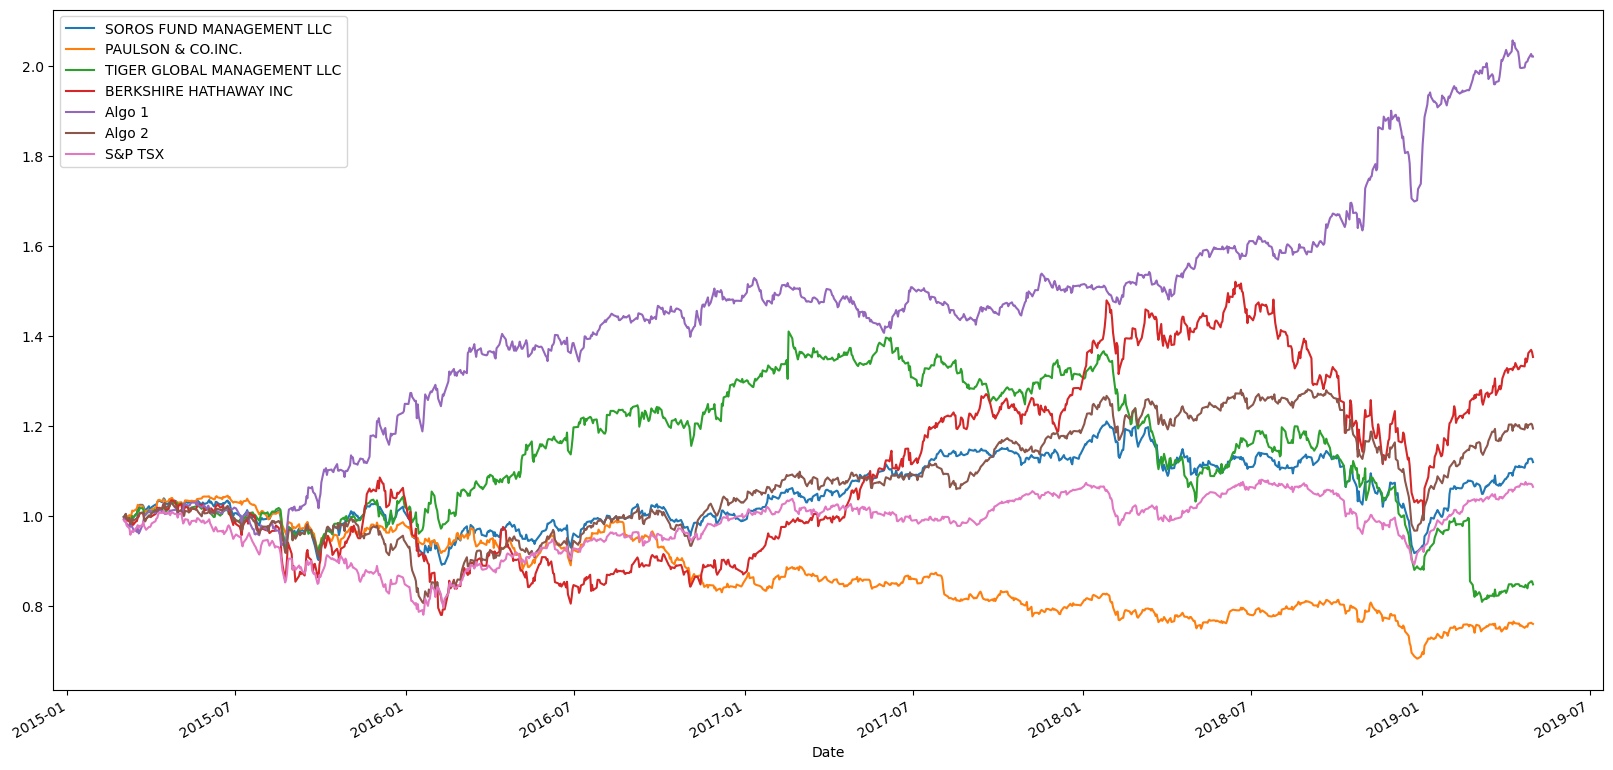

In [17]:
# Calculate cumulative returns of all portfolios
combined_cumulative_returns = (1 + combined_returns).cumprod()

# Plot cumulative returns
combined_cumulative_returns.plot(figsize=[20, 10])

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<Axes: >

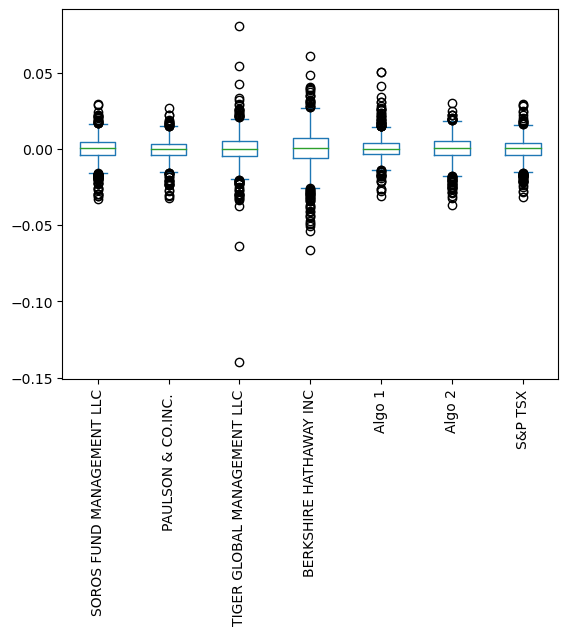

In [18]:
# Box plot to visually show risk
combined_returns.plot.box(rot=90)

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
combined_standard_deviations = combined_returns.std()

### Determine which portfolios are riskier than the S&P TSX 60

In [20]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_standard_deviation = combined_standard_deviations["S&P TSX"]

# Determine which portfolios are riskier than the S&P TSX 60
for portfolio, standard_deviation in combined_standard_deviations.items():
    if standard_deviation > sp_tsx_standard_deviation:
        print (portfolio)

SOROS FUND MANAGEMENT LLC
TIGER GLOBAL MANAGEMENT LLC
BERKSHIRE HATHAWAY INC
Algo 1
Algo 2


### Calculate the Annualized Standard Deviation

In [46]:
# Calculate the annualized standard deviation (252 trading days)
combined_annualized_standard_deviations = combined_returns.std() * np.sqrt(252)
combined_annualized_standard_deviations

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

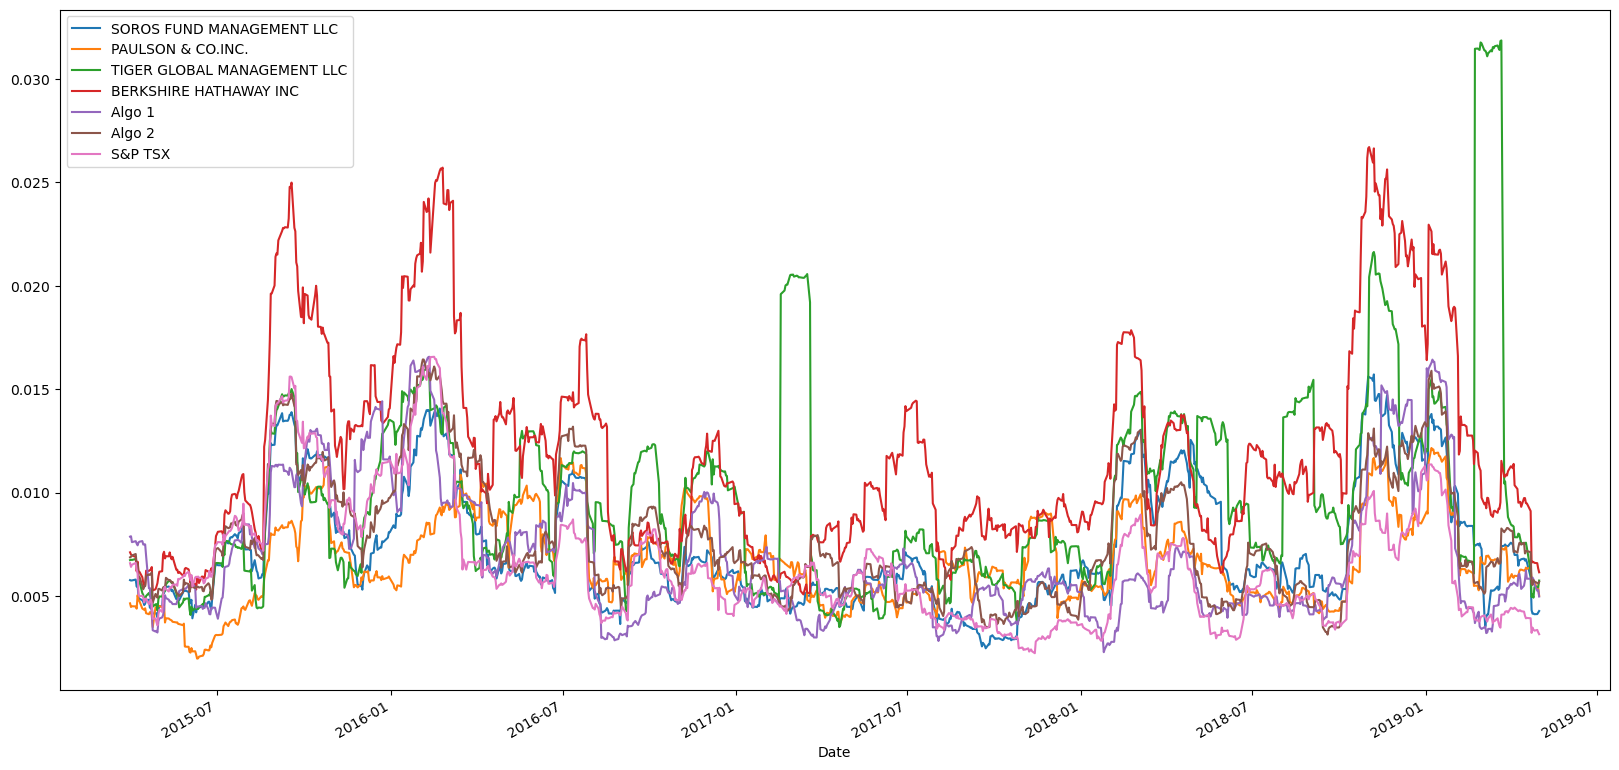

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_rolling_21_standard_deviations = combined_returns.rolling(window=21).std()

# Plot the rolling standard deviation
combined_rolling_21_standard_deviations.plot(figsize=[20, 10])

### Calculate and plot the correlation

In [23]:
# Calculate the correlation
combined_correlations = combined_rolling_21_standard_deviations.corr()

# Display de correlation matrix
combined_correlations

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.639357,0.440919,0.850889,0.704403,0.864039,0.753445
PAULSON & CO.INC.,0.639357,1.000000,0.399144,0.611234,0.572830,0.669701,0.437059
TIGER GLOBAL MANAGEMENT LLC,0.440919,0.399144,1.000000,0.400139,0.257098,0.349122,0.269010
BERKSHIRE HATHAWAY INC,0.850889,0.611234,0.400139,1.000000,0.778384,0.816004,0.744956
Algo 1,0.704403,0.572830,0.257098,0.778384,1.000000,0.757384,0.772080
Algo 2,0.864039,0.669701,0.349122,0.816004,0.757384,1.000000,0.861322
S&P TSX,0.753445,0.437059,0.269010,0.744956,0.772080,0.861322,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<Axes: xlabel='Date'>

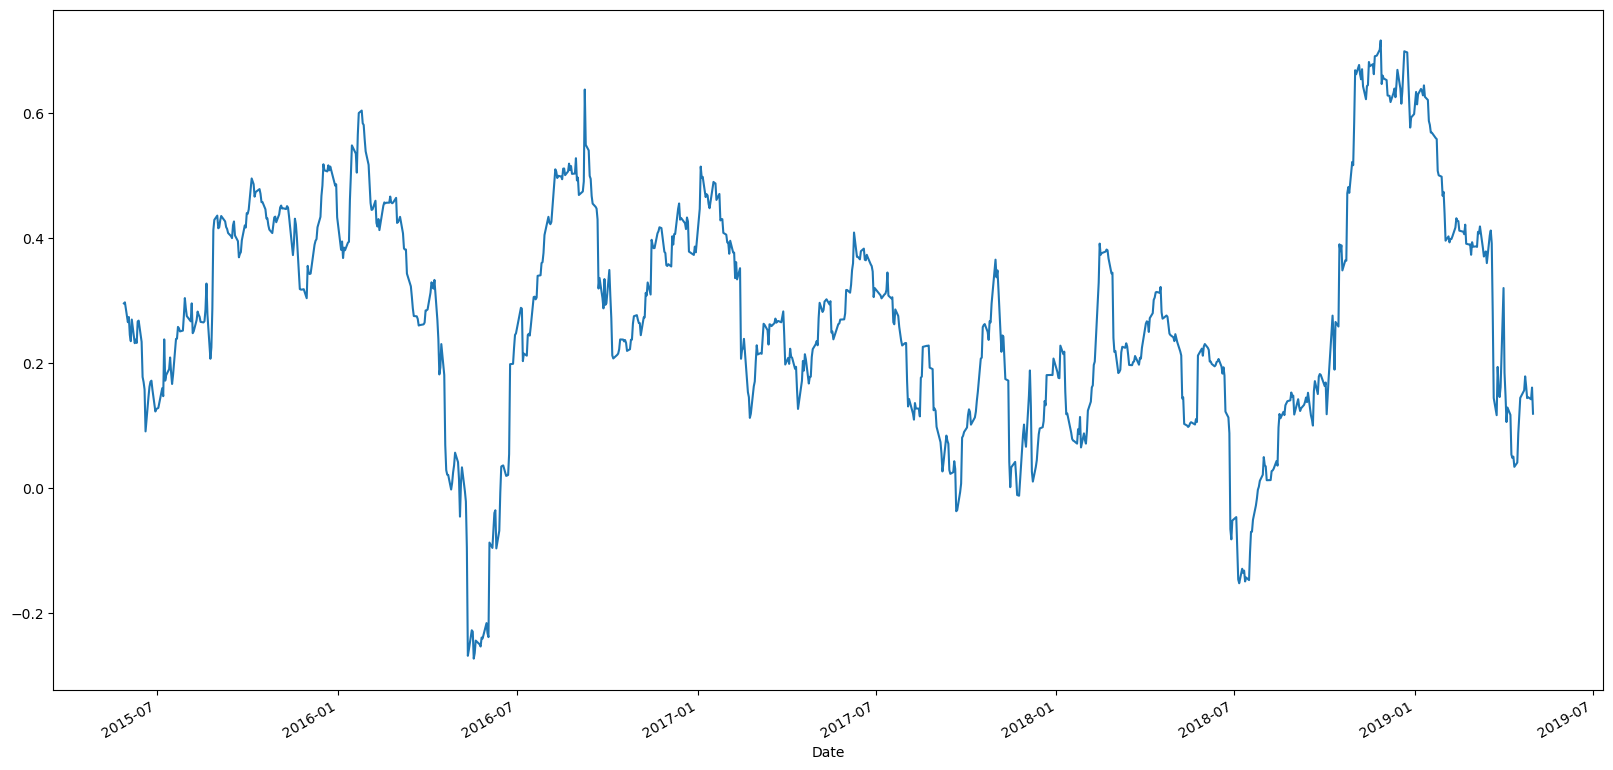

In [24]:
# Calculate covariance of a single portfolio
algo_1_rolling_60_covariance = combined_returns["Algo 1"].rolling(window=60).cov(combined_returns["S&P TSX"])

# Calculate variance of S&P TSX
sp_tsx_rolling_60_variance = combined_returns["S&P TSX"].rolling(window=60).var()

# Computing beta
algo_1_rolling_60_beta = algo_1_rolling_60_covariance / sp_tsx_rolling_60_variance

# Plot beta trend
algo_1_rolling_60_beta.plot(figsize=[20, 10])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [25]:
# Use `ewm` to calculate the rolling window
combined_ewm_21 = combined_returns.ewm(halflife='21 days', times=combined_returns.index).std()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
combined_annualized_sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))

<Axes: >

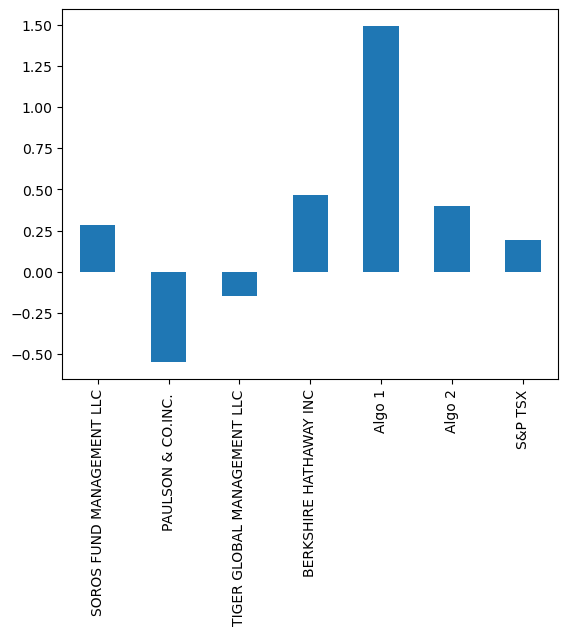

In [27]:
# Visualize the sharpe ratios as a bar plot
combined_annualized_sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Per the bar chart above, Algo 1 outperformed the market and all other portfolios. Similarly, Algo 2 outperformed the market and all non-algorithmic portfolios but that of Berkshire Hathaway Inc.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Reading data from 1st stock
aapl_historical_filepath = Path('Resources/aapl_historical.csv')
aapl_historical = pd.read_csv(aapl_historical_filepath, index_col="Date", infer_datetime_format=True, parse_dates=True)
#aapl_historical.drop(columns="Symbol", inplace=True)

In [29]:
# Reading data from 2nd stock
goog_historical_filepath = Path('Resources/goog_historical.csv')
goog_historical = pd.read_csv(goog_historical_filepath, index_col="Date", infer_datetime_format=True, parse_dates=True)
#goog_historical.drop(columns="Symbol", inplace=True)

In [30]:
# Reading data from 3rd stock
l_historical_filepath = Path('Resources/l_historical.csv')
l_historical = pd.read_csv(l_historical_filepath, index_col="Date", infer_datetime_format=True, parse_dates=True)
#l_historical.drop(columns="Symbol", inplace=True)

In [31]:
# Reading data from 4th stock
otex_historical_filepath = Path('Resources/otex_historical.csv')
otex_historical = pd.read_csv(otex_historical_filepath, index_col="Date", infer_datetime_format=True, parse_dates=True)
#otex_historical.drop(columns="Symbol", inplace=True)

In [32]:
# Reading data from 5th stock
tsla_historical_filepath = Path('Resources/tsla_historical.csv')
tsla_historical = pd.read_csv(tsla_historical_filepath, index_col="Date", infer_datetime_format=True, parse_dates=True)
#tsla_historical.drop(columns="Symbol", inplace=True)

In [33]:
# Combine all stocks in a single DataFrame
custom_portfolio = pd.concat([aapl_historical, goog_historical, l_historical, otex_historical, tsla_historical], axis='rows', join='inner')

In [34]:
# Reset Date index
custom_portfolio = custom_portfolio.reset_index()

In [35]:
# Reorganize portfolio data by having a column per symbol
custom_portfolio = custom_portfolio.pivot_table(values="Close", index="Date", columns="Symbol")

In [36]:
# Calculate daily returns
custom_portfolio_returns = custom_portfolio.pct_change()

# Drop NAs
custom_portfolio_returns.dropna(inplace=True)

# Display sample data
custom_portfolio_returns.head()

Symbol,AAPL,GOOG,L,OTEX,TSLA
Date,,,,,
2018-01-03,-0.000232,0.016338,-0.010002,-0.011703,-0.010295
2018-01-04,0.004645,0.003695,0.000174,-0.003715,-0.008511
2018-01-05,0.011327,0.014543,0.000000,-0.007924,0.006676
2018-01-08,-0.003657,0.004355,-0.009753,-0.009631,0.062530
2018-01-09,-0.000229,-0.000723,0.008969,-0.000712,-0.008025


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [37]:
# Set weights
weights = [1/5, 1/5, 1/5, 1/5, 1/5]

# Calculate portfolio return
custom_portfolio_weighted_returns = custom_portfolio_returns.dot(weights)

# Display sample data
custom_portfolio_weighted_returns.head()

Date
2018-01-03   -0.003179
2018-01-04   -0.000742
2018-01-05    0.004925
2018-01-08    0.008769
2018-01-09   -0.000144
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [38]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolios_returns = pd.concat([combined_returns, custom_portfolio_weighted_returns], axis="columns", join="inner")
all_portfolios_returns.rename(columns={0:"Custom"}, inplace=True)

In [39]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios_returns.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [40]:
# Calculate the annualized `std`
all_portfolios_annualized_standard_deviations = all_portfolios_returns.std() * np.sqrt(252)

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

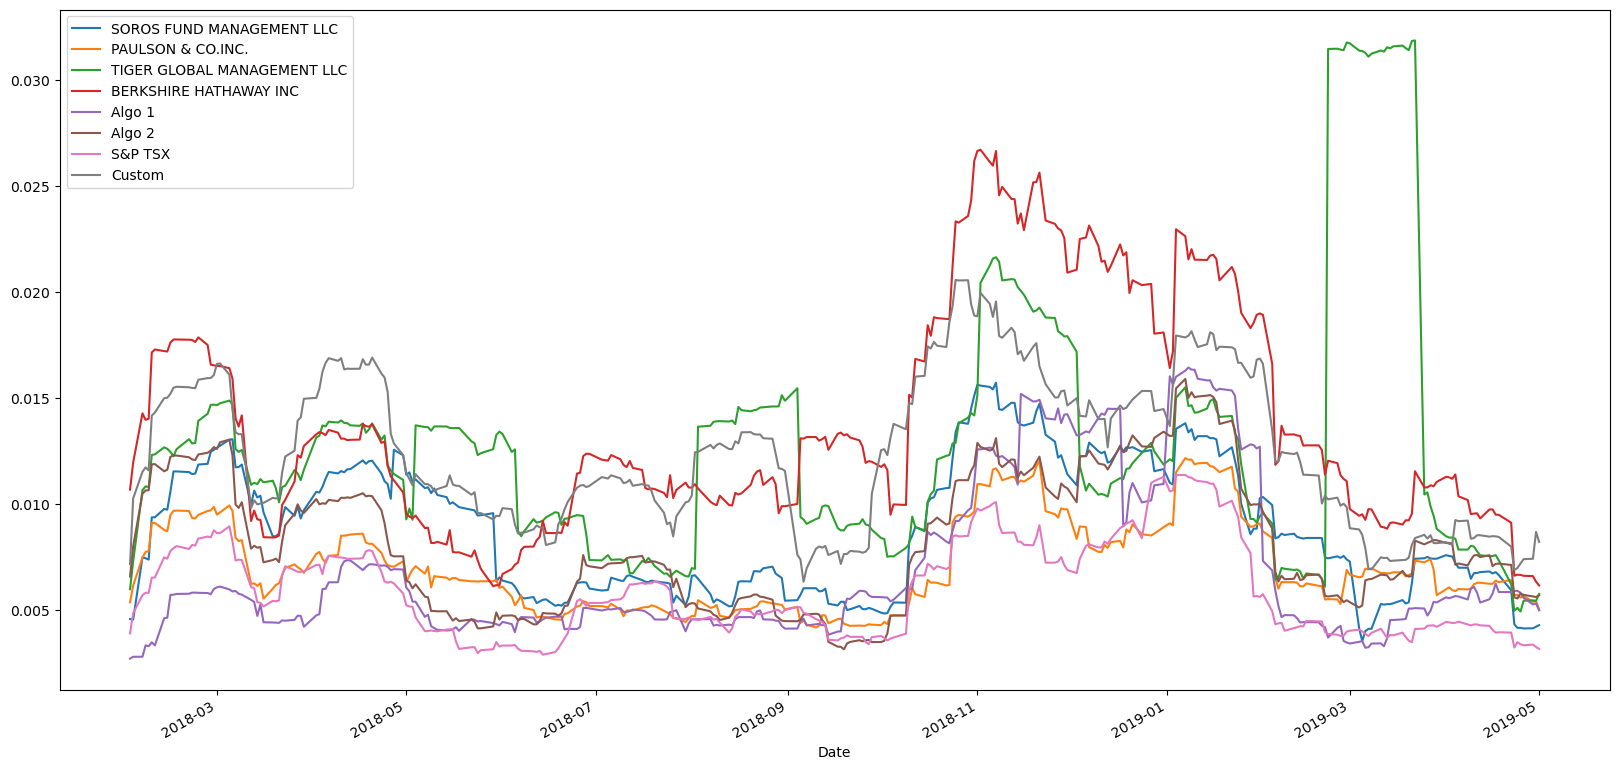

In [41]:
# Calculate rolling standard deviation
all_portfolios_rolling_21_standard_deviations = all_portfolios_returns.rolling(window=21).std()

# Plot rolling standard deviation
all_portfolios_rolling_21_standard_deviations.plot(figsize=[20,10])

### Calculate and plot the correlation

<Axes: >

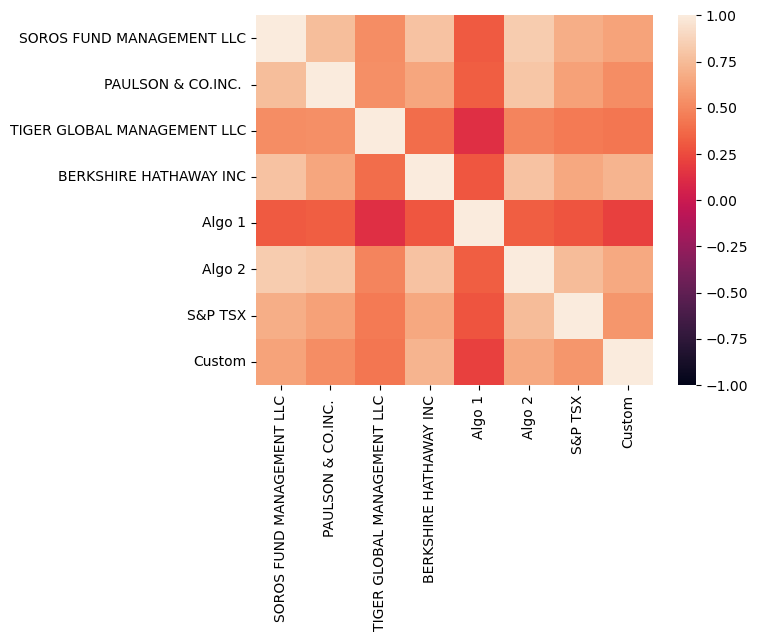

In [42]:
# Calculate and plot the correlation
all_portfolios_correlations = all_portfolios_returns.corr()
sns.heatmap(all_portfolios_correlations, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<Axes: xlabel='Date'>

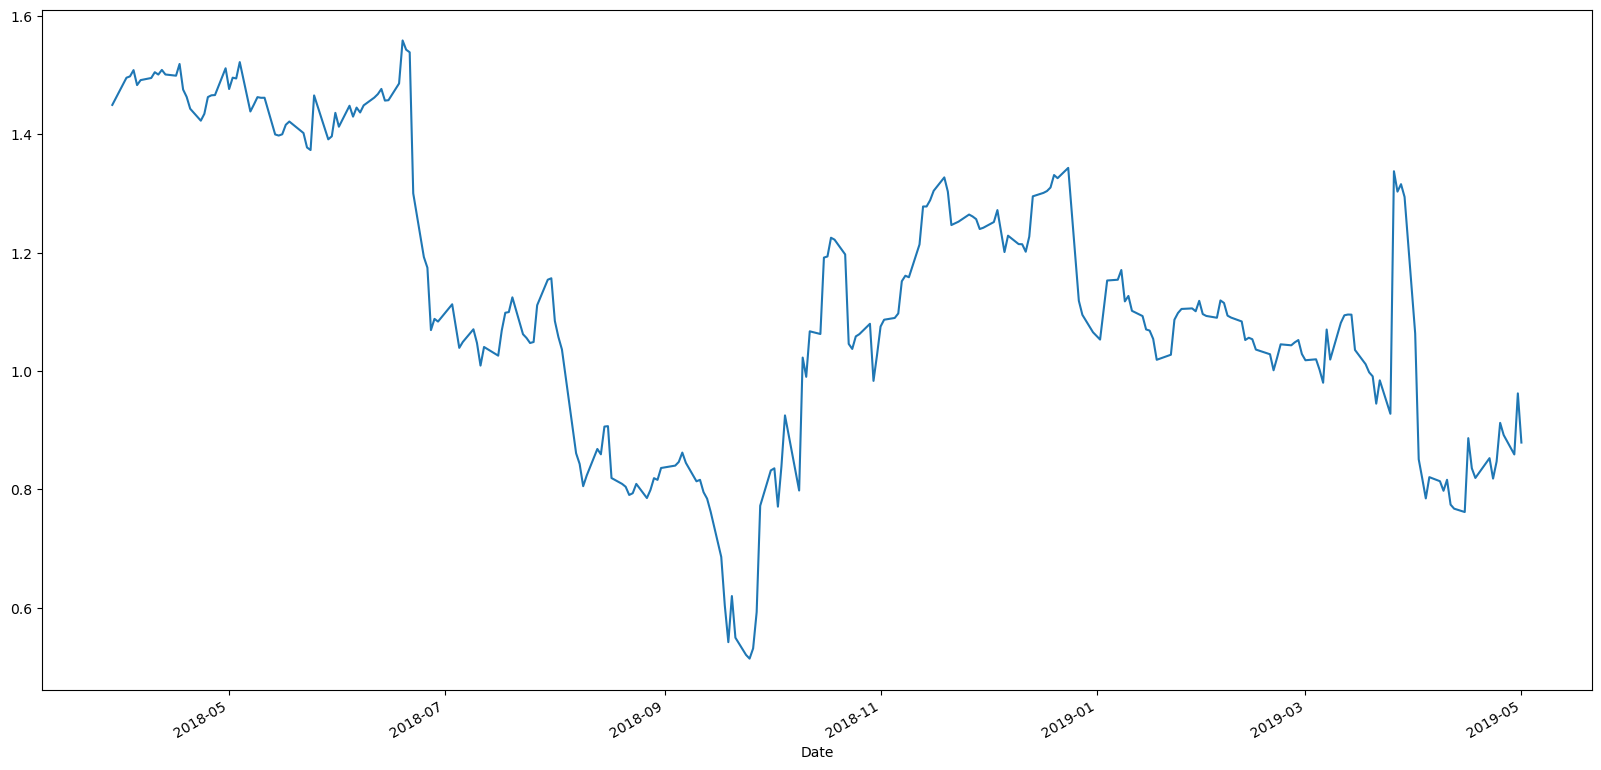

In [43]:
# Calculate and plot Beta
custom_portfolio_rolling_60_covariance = all_portfolios_returns["Custom"].rolling(window=60).cov(all_portfolios_returns["S&P TSX"])
custom_sp_tsx_rolling_60_variance = all_portfolios_returns["S&P TSX"].rolling(window=60).var()
custom_portfolio_rolling_60_beta = custom_portfolio_rolling_60_covariance / custom_sp_tsx_rolling_60_variance
custom_portfolio_rolling_60_beta.plot(figsize=[20, 10])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [44]:
# Calculate Annualized Sharpe Ratios
all_portfolios_annualized_sharpe_ratios = (all_portfolios_returns.mean() * 252) / (all_portfolios_returns.std() * np.sqrt(252))

<Axes: >

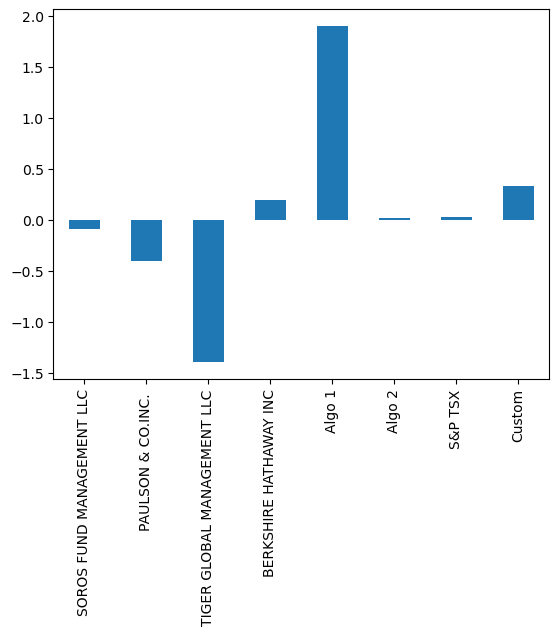

In [45]:
# Visualize the sharpe ratios as a bar plot
all_portfolios_annualized_sharpe_ratios.plot.bar()

### How does your portfolio do?

While not as strong as the Algo 1 portfolio, my portfolio does significantly better than the other portfolios.